In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv(r'world_cup.csv')
df.head()

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Attendance,AttendanceAvg,Matches
0,2022,Qatar,32,Argentina,France,Kylian Mbappé - 8,3404252,53191,64
1,2018,Russia,32,France,Croatia,Harry Kane - 6,3031768,47371,64
2,2014,Brazil,32,Germany,Argentina,James Rodríguez - 6,3429873,53592,64
3,2010,South Africa,32,Spain,Netherlands,"Wesley Sneijder, Thomas Müller... - 5",3178856,49670,64
4,2006,Germany,32,Italy,France,Miroslav Klose - 5,3352605,52384,64


In [4]:
top_scorer_info = df['TopScorrer'].str.split()
num_goals = top_scorer_info.str[-1].astype(int) 

df['num_of_goal_top_scorers'] = num_goals

In [5]:
df['TopScorrer'] = df['TopScorrer'].str.split(' - ').str[0]


In [6]:
df.head()


,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Attendance,AttendanceAvg,Matches,num_of_goal_top_scorers
0,2022,Qatar,32,Argentina,France,Kylian Mbappé,3404252,53191,64,8
1,2018,Russia,32,France,Croatia,Harry Kane,3031768,47371,64,6
2,2014,Brazil,32,Germany,Argentina,James Rodríguez,3429873,53592,64,6
3,2010,South Africa,32,Spain,Netherlands,"Wesley Sneijder, Thomas Müller...",3178856,49670,64,5
4,2006,Germany,32,Italy,France,Miroslav Klose,3352605,52384,64,5


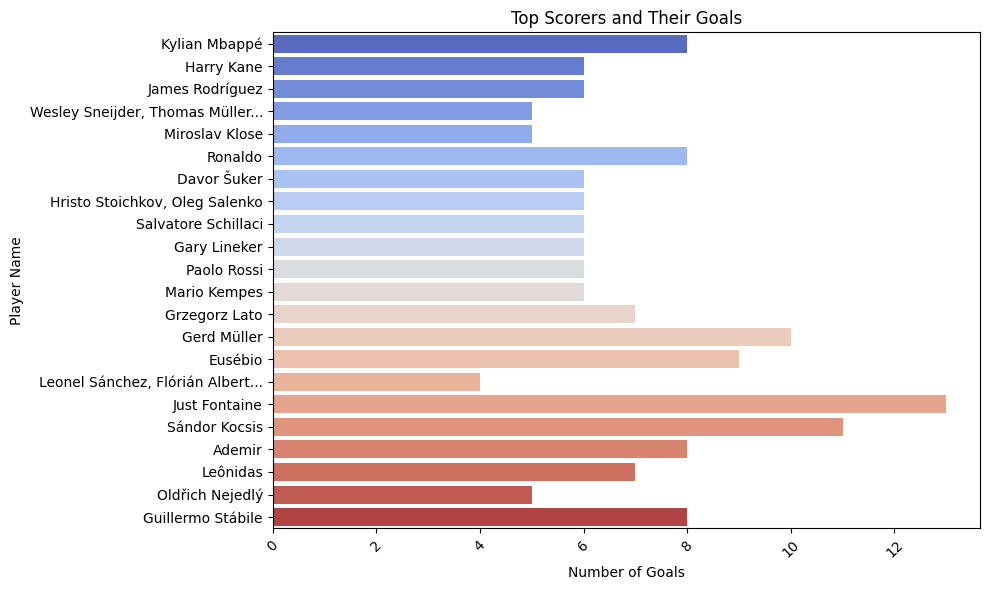

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x='num_of_goal_top_scorers', y='TopScorrer', data=df, palette='coolwarm', hue='TopScorrer', dodge=False, legend=False)
plt.xlabel('Number of Goals')
plt.ylabel('Player Name')
plt.title('Top Scorers and Their Goals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

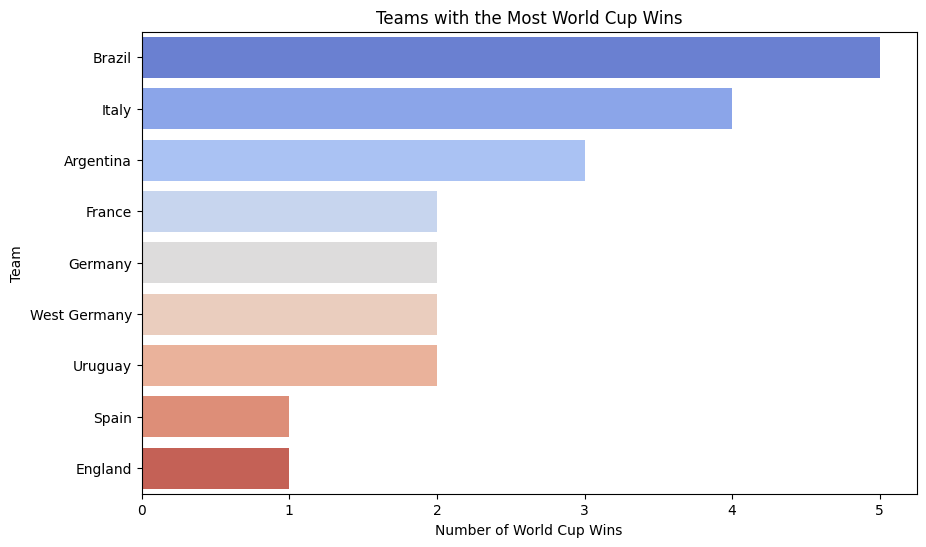

In [8]:
wins_per_team = df['Champion'].value_counts().reset_index()
wins_per_team.columns = ['Team', 'Wins']

plt.figure(figsize=(10, 6))
sns.barplot(x='Wins', y='Team', data=wins_per_team, palette='coolwarm', hue='Team')
plt.xlabel('Number of World Cup Wins')
plt.ylabel('Team')
plt.title('Teams with the Most World Cup Wins')
plt.show()

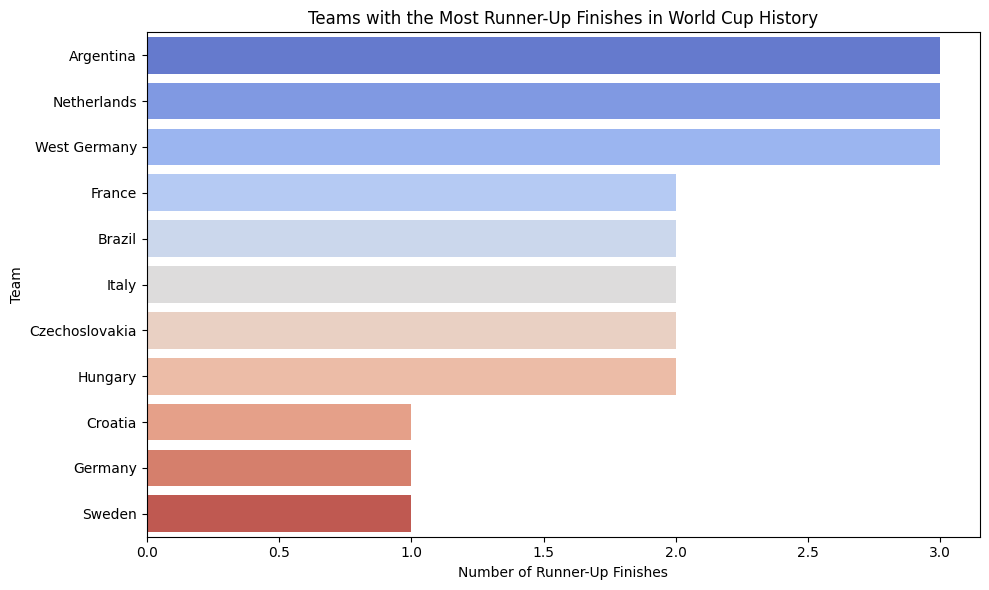

In [9]:
runner_up_counts = df['Runner-Up'].value_counts().reset_index()
runner_up_counts.columns = ['Team', 'Runner-Up Finishes']
runner_up_counts = runner_up_counts.sort_values(by='Runner-Up Finishes', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Runner-Up Finishes', y='Team', data=runner_up_counts, palette='coolwarm', hue='Team', dodge=False, legend=False)
plt.xlabel('Number of Runner-Up Finishes')
plt.ylabel('Team')
plt.title('Teams with the Most Runner-Up Finishes in World Cup History')
plt.tight_layout()
plt.show()


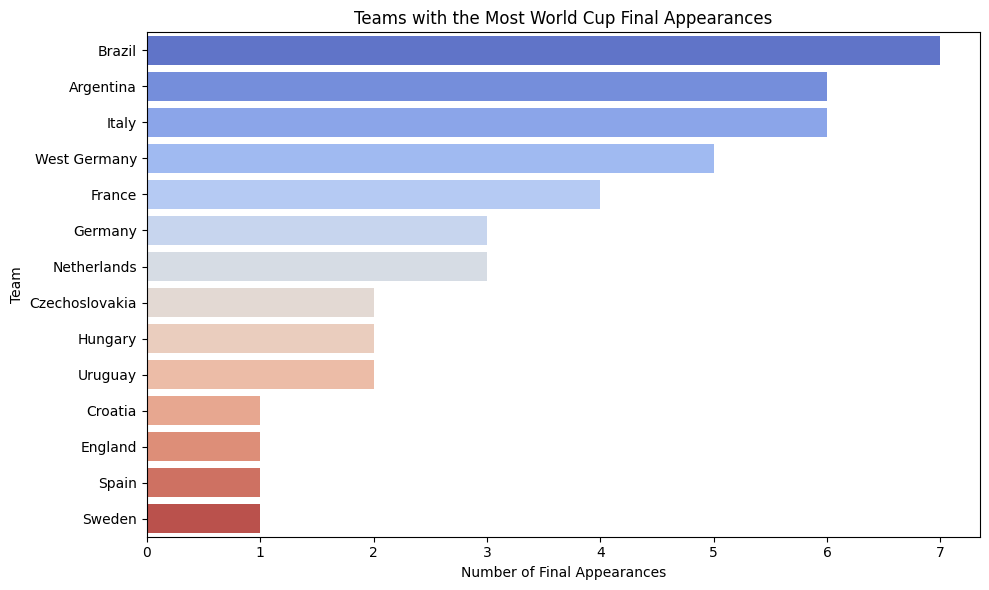

In [10]:
final_appearances_team1 = df['Champion'].value_counts().reset_index()
final_appearances_team1.columns = ['Team', 'Final Appearances']
final_appearances_team2 = df['Runner-Up'].value_counts().reset_index()
final_appearances_team2.columns = ['Team', 'Final Appearances']
final_appearances = pd.concat([final_appearances_team1, final_appearances_team2], ignore_index=True)
final_appearances = final_appearances.groupby('Team')['Final Appearances'].sum().reset_index()
final_appearances = final_appearances.sort_values(by='Final Appearances', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Final Appearances', y='Team', data=final_appearances, palette='coolwarm', hue='Team', dodge=False, legend=False)
plt.xlabel('Number of Final Appearances')
plt.xlabel('Number of Final Appearances')
plt.ylabel('Team')
plt.title('Teams with the Most World Cup Final Appearances')
plt.tight_layout()
plt.show()

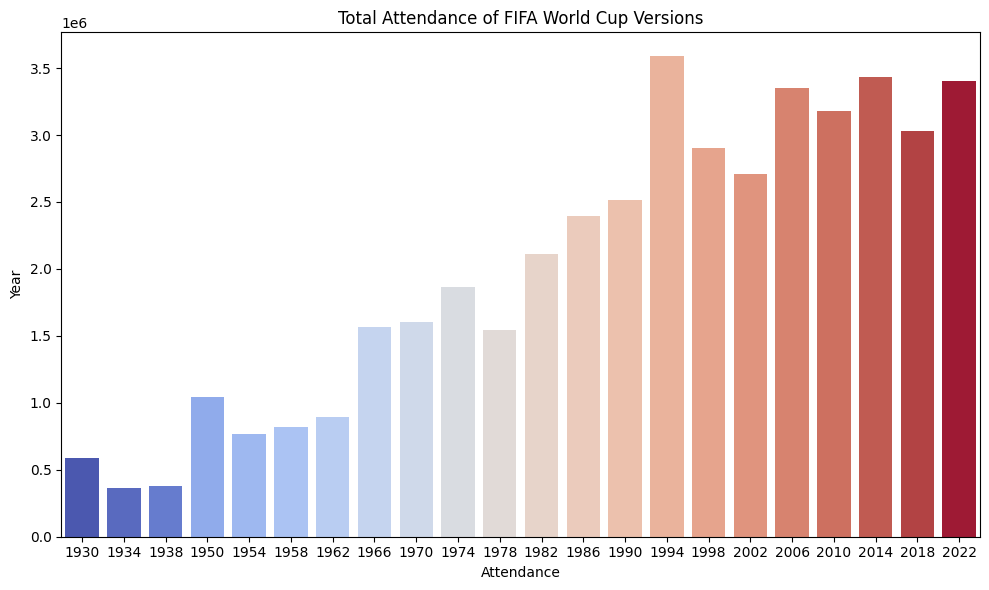

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Attendance' , data = df, palette='coolwarm', hue='Year' , dodge=False , legend=False)
plt.title('Total Attendance of FIFA World Cup Versions')
plt.xlabel('Attendance')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

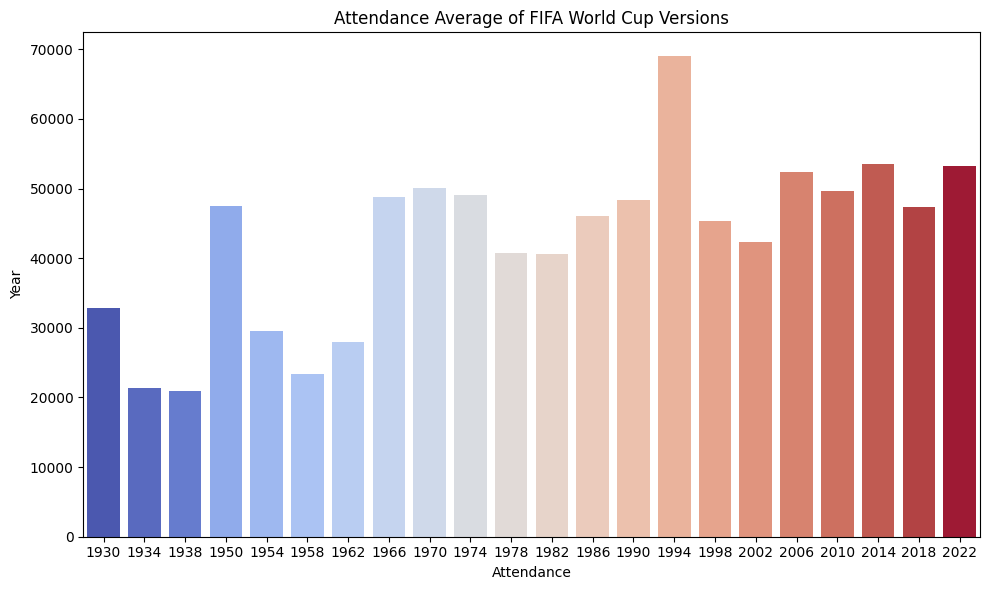

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='AttendanceAvg' , data = df, palette='coolwarm', hue='Year' , dodge=False , legend=False)
plt.title('Attendance Average of FIFA World Cup Versions')
plt.xlabel('Attendance')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

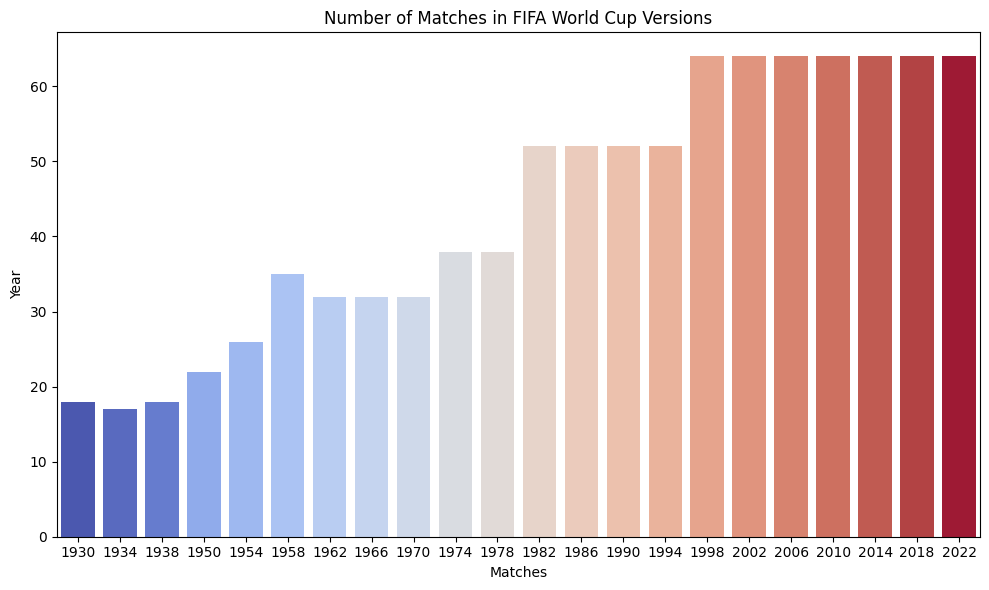

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Matches' , data = df, palette='coolwarm', hue='Year' , dodge=False , legend=False)
plt.title('Number of Matches in FIFA World Cup Versions')
plt.xlabel('Matches')
plt.ylabel('Year')
plt.tight_layout()
plt.show()


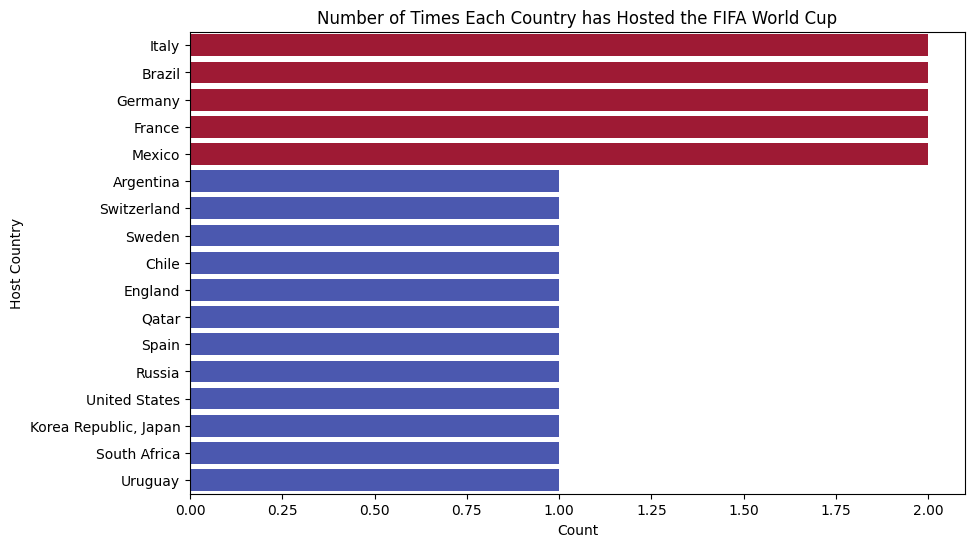

In [14]:
host_counts = df['Host'].value_counts().reset_index()
host_counts.columns = ['Host', 'Count']

# Plotting the data using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Host', data=host_counts, palette='coolwarm',  hue='Count' , dodge=False , legend=False)
plt.title('Number of Times Each Country has Hosted the FIFA World Cup')
plt.xlabel('Count')
plt.ylabel('Host Country')
plt.show()